# SARIMA

Selain parameter (p,d,q) pada model ARIMA, SARIMA memiliki parameter tambahan yaitu (P,D,Q)m yang secara spesifik mendeskripsikan komponen musiman dari model.

---
In addition to the parameters (p, d, q) in the ARIMA model, SARIMA has additional parameters, namely (P, D, Q) m which specifically describe the seasonal component of the model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import SARIMAX model library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
# import library for ETS (Error Trend Seasonal) plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# import library for grid search model order
from pmdarima import auto_arima

In [6]:
# monthly plot to see seasonality
from statsmodels.graphics.tsaplots import month_plot

In [7]:
# library for model evaluation metrics
from statsmodels.tools.eval_measures import rmse, mse, meanabs

In [8]:
# import dataset
co2_df = pd.read_csv("UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv")

In [9]:
co2_df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [10]:
# prepare for the datetime index from the columns(1)
co2_df['date'] = pd.to_datetime({'year': co2_df['year'], 'month':co2_df['month'], 'day': 1})

# actually you can fill in 'day' with anything because this is monthly data, 
# only if it is filled with the end of the month there will be several options 28, 29, 30, 31

In [11]:
co2_df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [12]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [13]:
# prepare for the datetime index from the columns(2)
co2_df = co2_df.set_index('date')
co2_df.index.freq = 'MS'

In [14]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Freq: MS
Data columns (total 5 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [15]:
co2_df.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq='MS')

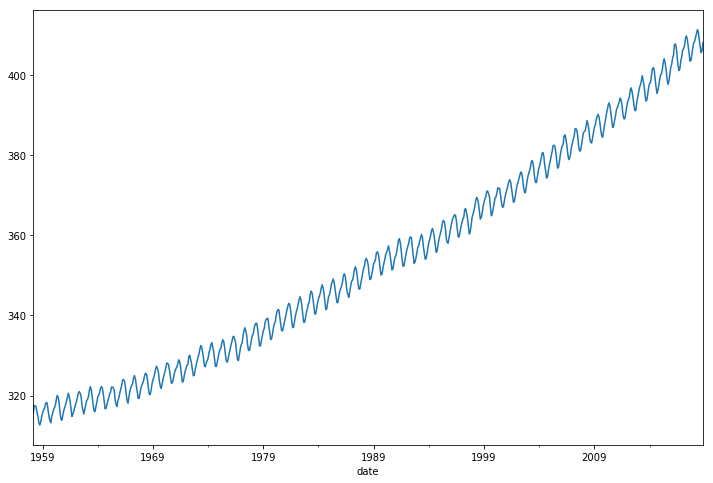

In [16]:
# plot time series data
co2_df['interpolated'].plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

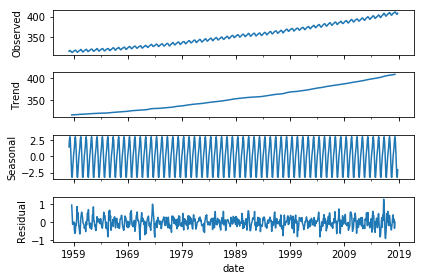

In [17]:
# ets plot
ets = seasonal_decompose(co2_df['interpolated'], model='add')
ets.plot();

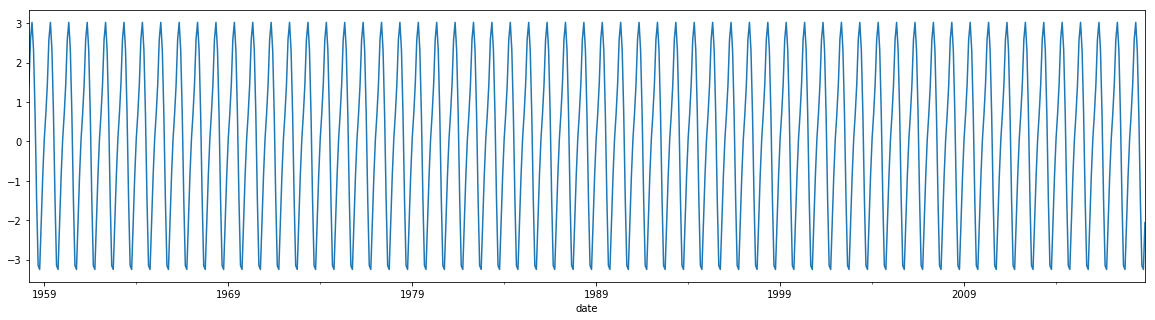

In [18]:
ets.seasonal.plot(figsize=(20, 5)).autoscale(axis='x', tight=True)

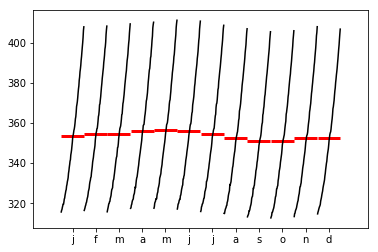

In [19]:
month_plot(co2_df['interpolated']);

In [20]:
# grid search model order
# m : int, optional (default=1)
#     The period for seasonal differencing, ``m`` refers to the number of
#     periods in each season. For example, ``m`` is 4 for quarterly data, 12
#     for monthly data, or 1 for annual (non-seasonal) data. Default is 1.
#     Note that if ``m`` == 1 (i.e., is non-seasonal), ``seasonal`` will be
#     set to False. For more information on setting this parameter, see
#     :ref:`period`.

auto_arima(co2_df['interpolated'], seasonal=True, m=12, trace=True).summary()

C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=461.747, BIC=498.470, Fit time=9.368 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2369.532, BIC=2378.713, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=804.125, BIC=822.486, Fit time=2.437 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1614.808, BIC=1633.170, Fit time=1.717 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1101.985, BIC=1134.117, Fit time=8.250 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 12); AIC=458.235, BIC=499.548, Fit time=36.510 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 0, 12); AIC=608.458, BIC=645.181, Fit time=54.415 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(2, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=762.878, BIC=795.010, Fit time=13.363 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 1, 12); AIC=453.076, BIC=489.798, Fit time=52.215 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 12); AIC=455.226, BIC=487.358, Fit time=29.477 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 3) seasonal_order=(2, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 1, 12); AIC=429.502, BIC=457.044, Fit time=37.849 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=424.898, BIC=447.850, Fit time=18.565 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=791.154, BIC=809.516, Fit time=8.232 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=445.239, BIC=472.781, Fit time=129.722 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1935.623, BIC=1949.394, Fit time=0.392 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(2, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=427.639, BIC=455.181, Fit time=10.458 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=501.791, BIC=520.153, Fit time=6.661 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=432.465, BIC=460.006, Fit time=8.185 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=450.426, BIC=482.558, Fit time=7.680 seconds
Total fit time: 435.865 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.449
Date:                            Thu, 28 Jan 2021   AIC                            424.898
Time:                                    15:02:15   BIC                            447.850
Sample:                                         0   HQIC                           433.754
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.986      0.324      -0.001       0.002
ma.L1         -0.3808      0.034    -11.210      0.000      -0.447      -0.314
ar.S.L12       0.9995      0.000   3168.496      0.000       0.999       1.000
ma.S.L12      -0.8642      0.021    -40.209      0.000      -0.906      -0.822
sigma2         0.0962      0.005     20.369      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       52.06   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
len(co2_df)

729

In [22]:
# trai test split
# test 12 month
train = co2_df.iloc[:717]
test = co2_df.iloc[717:]

In [23]:
# fit (train) model
model = SARIMAX(train['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
fitted_model = model.fit()

In [24]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Thu, 28 Jan 2021   AIC                            418.297
Time:                                    15:02:50   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.034    -10.854      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3189.398      0.000       0.999       1.000
ma.S.L12      -0.8647      0.023    -37.670      0.000      -0.910      -0.820
sigma2         0.0959      0.005     20.268      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.92   Jarque-Bera (JB):                 3.78
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# length of predictions
start = len(train)
end = len(train) + len(test) - 1

In [26]:
# let's predict
predictions = fitted_model.predict(start, end, typ='levels').rename("SARIMAX Predictions")

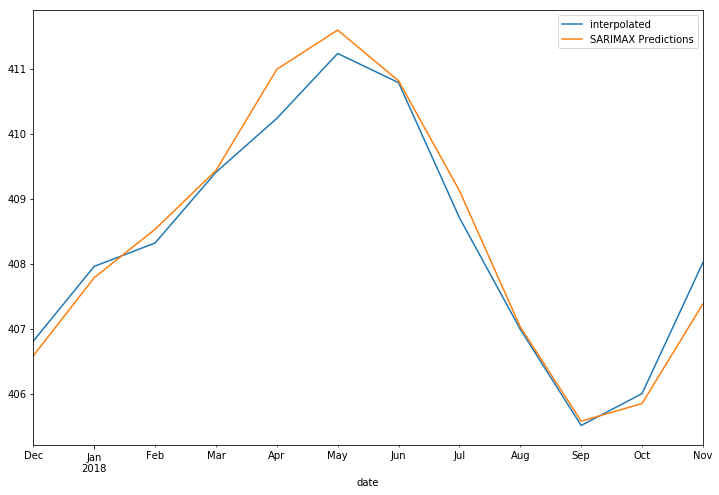

In [27]:
# plot the result (predictions)
test['interpolated'].plot(figsize=(12, 8), legend=True).autoscale(axis='x', tight=True)
predictions.plot(legend=True)

In [28]:
# evaluate predictions result
rmse(test['interpolated'], predictions)

0.34626464366078397

In [29]:
test['interpolated'].mean()

408.3333333333333

In [30]:
predictions.mean()

408.3925230662921

In [31]:
# let's forecast to the future (1)
model_f = SARIMAX(co2_df['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
fitted_model_f = model_f.fit()

In [32]:
# let's forecast to the future (2)
fitted_model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.445
Date:                            Thu, 28 Jan 2021   AIC                            426.890
Time:                                    15:03:12   BIC                            445.252
Sample:                                03-01-1958   HQIC                           433.975
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3715      0.034    -10.874      0.000      -0.438      -0.305
ar.S.L12       0.9997      0.000   3226.594      0.000       0.999       1.000
ma.S.L12      -0.8655      0.022    -40.081      0.000      -0.908      -0.823
sigma2         0.0963      0.005     20.356      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       51.06   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.11   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# let's forecast into the unknown future (3)
fcast = fitted_model_f.predict(start=len(co2_df), end=len(co2_df)+11, typ='levels').rename("SARIMAX Forecast")

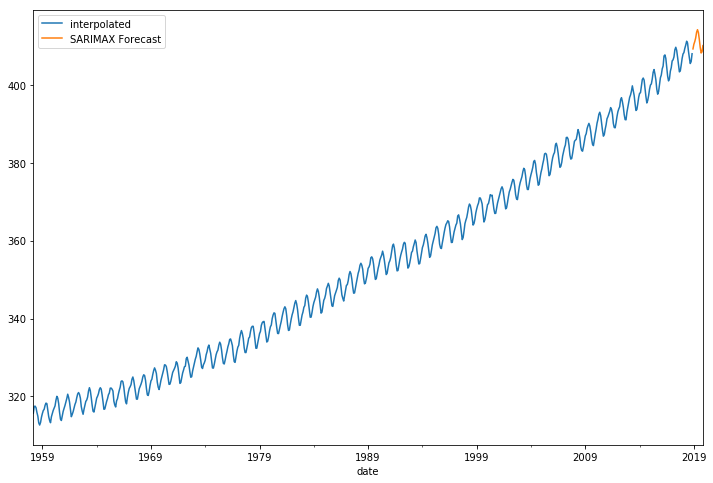

In [34]:
# plot the result (forecast)
co2_df['interpolated'].plot(figsize=(12, 8), legend=True).autoscale(axis='x', tight=True)
fcast.plot(legend=True)

# SARIMAX

SARIMA dimplementasikan dengan ```SARIMAX``` dari statsmodels. "X" memiliki arti bahwa fungsi tersebut mendukung variabel regressor exogenous.

---
SARIMA is implemented with ```SARIMAX``` from statsmodels. "X" means that the function supports exogenous regressor variables.

In [35]:
# import dataset for this part
restaurant_df = pd.read_csv("UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv",
                            index_col='date',
                            parse_dates=True)

restaurant_df.index.freq = 'D'

In [36]:
restaurant_df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [37]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
weekday         517 non-null object
holiday         517 non-null int64
holiday_name    517 non-null object
rest1           478 non-null float64
rest2           478 non-null float64
rest3           478 non-null float64
rest4           478 non-null float64
total           478 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [38]:
restaurant_df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [39]:
# drop rows with missing values, 39 last rows
restaurant_df1 = restaurant_df.dropna()

In [40]:
restaurant_df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [41]:
restaurant_df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [42]:
columns = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in columns:
    restaurant_df1[col] = restaurant_df1[col].astype(int)

In [43]:
restaurant_df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


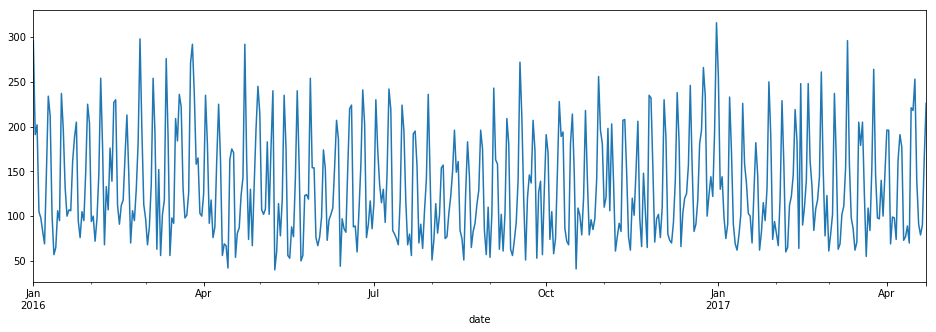

In [44]:
restaurant_df1['total'].plot(figsize=(16, 5)).autoscale(axis='x', tight=True)

In [45]:
restaurant_df1[restaurant_df1['holiday']==1].index
# restaurant_df1.query('holiday==1').index
# the same result

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

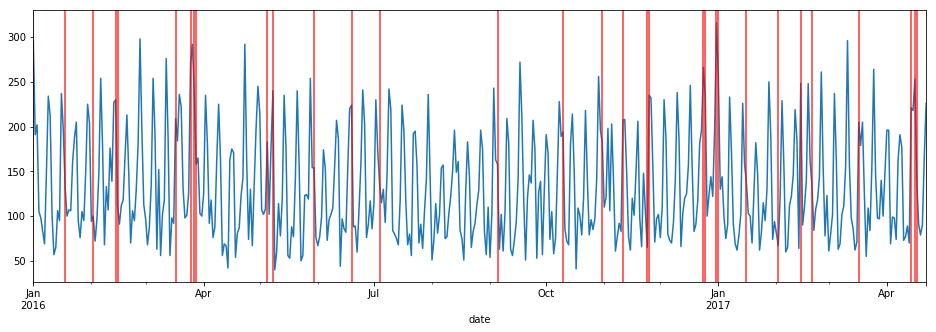

In [46]:
ax = restaurant_df1['total'].plot(figsize=(16, 5))

for day in restaurant_df1[restaurant_df1['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)
    
ax.autoscale(axis='x', tight=True)

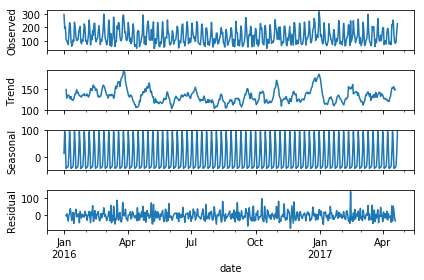

In [47]:
ets_restaurant = seasonal_decompose(restaurant_df1['total'])
ets_restaurant.plot();

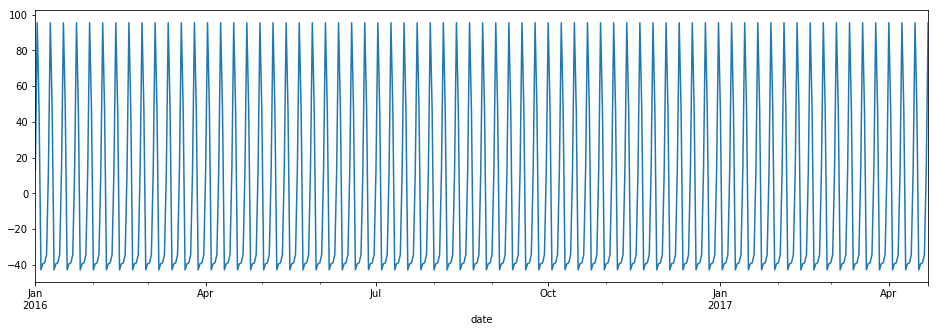

In [48]:
ets_restaurant.seasonal.plot(figsize=(16, 5)).autoscale(axis='x', tight=True)

Terlihat bahwa terdapat musiman yang kuat yang memiliki siklus mingguan.

---
It appears that there is a strong seasonality which has a weekly cycle.

In [49]:
len(restaurant_df1)

478

In [53]:
train2 = restaurant_df1.iloc[:450]

In [54]:
test2 = restaurant_df1.iloc[450:]

In [55]:
auto_arima(train2['total'], seasonal=True, m=7, trace=True).summary()

C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4631.332, BIC=4664.206, Fit time=4.480 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=4964.792, BIC=4973.011, Fit time=0.035 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4637.792, BIC=4654.229, Fit time=1.390 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=4759.288, BIC=4775.725, Fit time=0.921 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 7); AIC=4745.263, BIC=4774.028, Fit time=3.234 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=4661.426, BIC=4698.409, Fit time=9.765 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 0, 7); AIC=4627.322, BIC=4656.086, Fit time=2.630 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) seasonal_order=(1, 0, 0, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) seasonal_order=(1, 0, 0, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 0, 2) seasonal_order=(1, 0, 0, 7); AIC=4642.717, BIC=4667.373, Fit time=1.740 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 0, 7); AIC=4627.708, BIC=4660.582, Fit time=2.435 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=4650.847, BIC=4671.394, Fit time=1.015 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 0, 7); AIC=4659.888, BIC=4696.871, Fit time=3.355 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 7); AIC=4855.749, BIC=4880.404, Fit time=0.785 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 0, 7); AIC=4563.273, BIC=4596.147, Fit time=5.500 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 2) seasonal_order=(2, 0, 0, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) seasonal_order=(2, 0, 0, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 0, 2) seasonal_order=(2, 0, 0, 7); AIC=4700.169, BIC=4728.934, Fit time=6.815 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 3) seasonal_order=(2, 0, 0, 7); AIC=4560.814, BIC=4597.797, Fit time=7.190 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 4) seasonal_order=(2, 0, 0, 7); AIC=4552.171, BIC=4597.372, Fit time=33.426 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 4) seasonal_order=(1, 0, 0, 7); AIC=4581.897, BIC=4622.990, Fit time=3.929 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 4) seasonal_order=(2, 0, 1, 7); AIC=4692.911, BIC=4742.222, Fit time=23.403 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 4) seasonal_order=(2, 0, 0, 7); AIC=4558.354, BIC=4599.447, Fit time=6.856 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 4) seasonal_order=(2, 0, 0, 7); AIC=4556.420, BIC=4605.731, Fit time=22.880 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 0, 7); AIC=4583.174, BIC=4624.266, Fit time=22.530 seconds


C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 5) seasonal_order=(2, 0, 0, 7); AIC=4595.374, BIC=4644.685, Fit time=25.130 seconds
Total fit time: 189.680 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  450
Model:             SARIMAX(3, 0, 4)x(2, 0, 0, 7)   Log Likelihood               -2265.085
Date:                           Thu, 28 Jan 2021   AIC                           4552.171
Time:                                   15:59:19   BIC                           4597.372
Sample:                                        0   HQIC                          4569.986
                                           - 450                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    117.7667     34.945      3.370      0.001      49.276     186.257
ar.L1         -2.1308      0.283     -7.535      0.000      -2.685      -1.577
ar.L2         -1.7363      0.453     -3.829      0.000      -2.625      -0.848
ar.L3         -0.4890      0.235     -2.079      0.038      -0.950      -0.028
ma.L1          2.3472      0.279      8.427      0.000       1.801       2.893
ma.L2          2.2265      0.495      4.502      0.000       1.257       3.196
ma.L3          0.9393      0.297      3.159      0.002       0.357       1.522
ma.L4          0.1957      0.062      3.138      0.002       0.073       0.318
ar.S.L7        0.5122      0.053      9.577      0.000       0.407       0.617
ar.S.L14       0.3299      0.050      6.649      0.000       0.233       0.427
sigma2      1413.4732     87.195     16.211      0.000    1242.575    1584.372
===================================================================================
Ljung-Box (Q):                       57.16   Jarque-Bera (JB):                43.06
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.53
Prob(H) (two-sided):                  0.66   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model2 = SARIMAX(train2['total'], order=(3, 0, 4), seasonal_order=(2, 0, 0, 7))
fitted_model2 = model2.fit()

C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [57]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  450
Model:             SARIMAX(3, 0, 4)x(2, 0, 0, 7)   Log Likelihood               -2282.146
Date:                           Thu, 28 Jan 2021   AIC                           4584.293
Time:                                   16:11:13   BIC                           4625.385
Sample:                               01-01-2016   HQIC                          4600.489
                                    - 03-25-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1305      0.041      3.198      0.001       0.051       0.210
ar.L2         -0.0903      0.046     -1.976      0.048      -0.180      -0.001
ar.L3          0.9592      0.043     22.307      0.000       0.875       1.043
ma.L1          0.0404      0.058      0.693      0.488      -0.074       0.155
ma.L2          0.0932      0.053      1.744      0.081      -0.012       0.198
ma.L3         -0.9098      0.051    -17.941      0.000      -1.009      -0.810
ma.L4         -0.1918      0.051     -3.732      0.000      -0.293      -0.091
ar.S.L7        0.4337      0.041     10.507      0.000       0.353       0.515
ar.S.L14       0.3934      0.041      9.660      0.000       0.314       0.473
sigma2      1421.7438     88.023     16.152      0.000    1249.222    1594.266
===================================================================================
Ljung-Box (Q):                       78.15   Jarque-Bera (JB):                25.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.46
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
start = len(train2)
end = len(train2) + len(test2) - 1

In [59]:
predictions2 = fitted_model2.predict(start=start, end=end).rename("SARIMA Predictions")

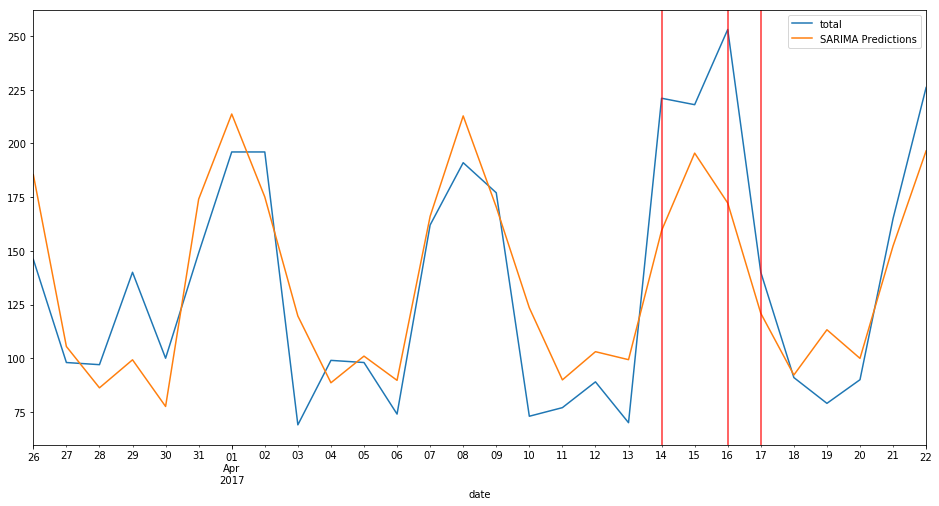

In [64]:
ax = test2['total'].plot(figsize=(16, 8), legend=True)
predictions2.plot(legend=True)


for day in test2[test2['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)
    
ax.autoscale(axis='x', tight=True)

In [61]:
rmse(test2['total'], predictions2)

30.47002541940805

In [62]:
test2['total'].mean()

135.14285714285714

For forecasting using exogenous variables, we must know **the exact value of the exogenous variable in the future**.

In [65]:
restaurant_df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
2016-01-06,Wednesday,0,na,9,11,22,41,83
2016-01-07,Thursday,0,na,15,6,18,30,69
2016-01-08,Friday,0,na,79,32,22,16,149
2016-01-09,Saturday,0,na,44,44,47,99,234


In [66]:
# for exogenous parameter must in dataframe
auto_arima(restaurant_df1['total'], exogenous=restaurant_df1[['holiday']], seasonal=True, m=7).summary()

C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASUS\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Max

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.654
Date:                           Thu, 28 Jan 2021   AIC                           4709.307
Time:                                   16:37:22   BIC                           4734.325
Sample:                                        0   HQIC                          4719.143
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5566      4.274      2.704      0.007       3.180      19.933
x1            74.8339      4.545     16.464      0.000      65.926      83.742
ma.L1          0.1781      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5060      0.045     11.232      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.983      0.000       0.300       0.468
sigma2      1142.0084     80.191     14.241      0.000     984.837    1299.179
===================================================================================
Ljung-Box (Q):                       85.08   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
model3 = SARIMAX(train2['total'], exog=train2[['holiday']], order=(0, 0, 1), seasonal_order=(2, 0, 0, 7))

In [68]:
fitted_model3 = model3.fit()

In [69]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  450
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2228.868
Date:                           Thu, 28 Jan 2021   AIC                           4467.736
Time:                                   17:01:16   BIC                           4488.283
Sample:                               01-01-2016   HQIC                          4475.834
                                    - 03-25-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.6471      4.281     16.035      0.000      60.256      77.038
ma.L1          0.1937      0.048      4.008      0.000       0.099       0.288
ar.S.L7        0.5002      0.041     12.324      0.000       0.421       0.580
ar.S.L14       0.4744      0.040     11.726      0.000       0.395       0.554
sigma2      1122.7322     72.227     15.545      0.000     981.170    1264.294
===================================================================================
Ljung-Box (Q):                      101.75   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.00   Prob(JB):                         0.63
Heteroskedasticity (H):               0.96   Skew:                             0.08
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
predictions3 = fitted_model3.predict(start=start, end=end, exog=test2[['holiday']]).rename("SARIMAX (with exogenous) Predictions")

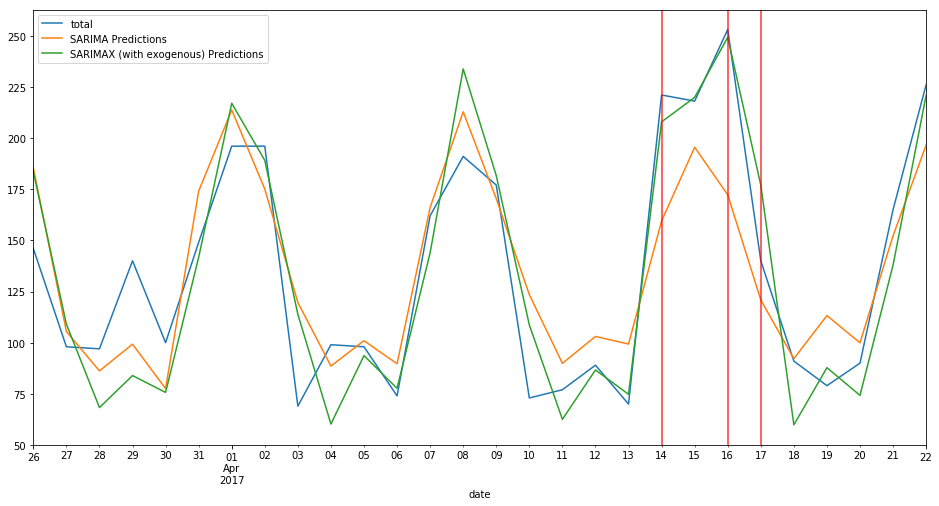

In [71]:
ax = test2['total'].plot(figsize=(16, 8), legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)


for day in test2[test2['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)
    
ax.autoscale(axis='x', tight=True)

In [72]:
rmse(test2['total'], predictions3)

24.977514956709374

In [73]:
# forecast in to the unknown future
# we know the exogenous variable values in the future
model_f2 = SARIMAX(restaurant_df1['total'], exog=restaurant_df1[['holiday']], order=(0, 0, 1), seasonal_order=(2, 0, 0, 7))

In [74]:
fitted_model_f2 = model_f2.fit()

In [75]:
fitted_model_f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2359.765
Date:                           Thu, 28 Jan 2021   AIC                           4729.529
Time:                                   17:17:32   BIC                           4750.377
Sample:                               01-01-2016   HQIC                          4737.726
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.3549      4.154     16.457      0.000      60.214      76.496
ma.L1          0.1848      0.047      3.959      0.000       0.093       0.276
ar.S.L7        0.5033      0.039     13.053      0.000       0.428       0.579
ar.S.L14       0.4718      0.038     12.265      0.000       0.396       0.547
sigma2      1089.2253     67.396     16.162      0.000     957.131    1221.320
===================================================================================
Ljung-Box (Q):                      106.41   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               0.85   Skew:                             0.08
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
exog_fcast = restaurant_df.iloc[478:][['holiday']]

In [78]:
len(exog_fcast)

39

In [79]:
start = len(restaurant_df1)
end = len(restaurant_df1) + len(exog_fcast) - 1

In [81]:
fcast2 = fitted_model_f2.predict(start=start, end=end, exog=exog_fcast).rename("SARIMAX (with exogenous) Forecast")

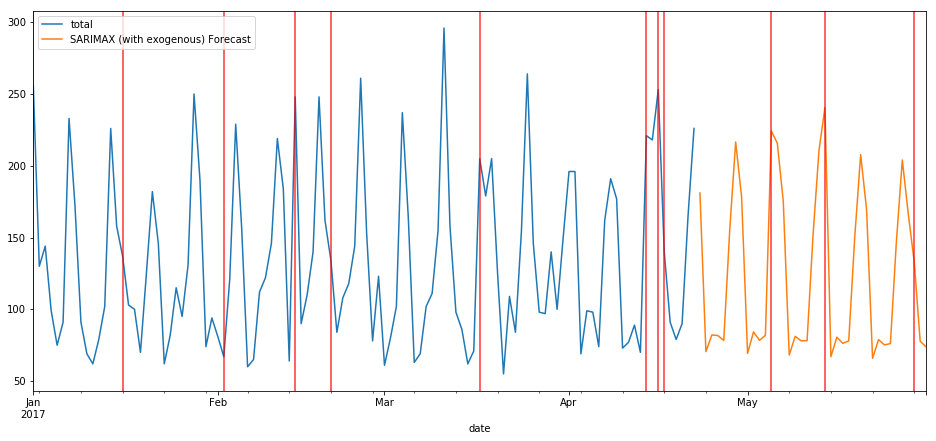

In [91]:
ax = restaurant_df1['total'].loc['2017-01-01':].plot(figsize=(16, 7), legend=True)
fcast2.plot(legend=True)

for day in restaurant_df.loc['2017-01-01':].query("holiday==1").index:
    ax.axvline(x=day, color='red', alpha=0.8)

ax.autoscale(axis='x', tight=True)